In [1]:
import pandas as pd
import json

In [2]:
df = pd.read_csv('moviesinfor.csv')
df

/var/folders/0_/_kr_lnjd3pdg8gkybtp8j5hw0000gn/T/ipykernel_78857/3656600438.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('moviesinfor.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [3]:
df.value_counts('title')

title
Cinderella              11
Alice in Wonderland      9
Hamlet                   9
Les Misérables           8
Beauty and the Beast     8
                        ..
Hollywood Hong Kong      1
Hollywood Hot Tubs       1
Hollywood Man            1
Hollywood North          1
ファンタスティポ                 1
Name: count, Length: 42277, dtype: int64

In [4]:
# Number of films
x = len(df.value_counts('title'))
print(f"Number of Films: {x}")

Number of Films: 42277


In [5]:
# Top 5 revenue films
x = df.sort_values('revenue', ascending=False)[:5]
x[['title','revenue']]

,title,revenue
14551,Avatar,2.787965e+09
26555,Star Wars: The Force Awakens,2.068224e+09
1639,Titanic,1.845034e+09
17818,The Avengers,1.519558e+09
25084,Jurassic World,1.513529e+09


In [6]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [7]:
x = df['production_countries'][0]
eval(x)

[{'iso_3166_1': 'US', 'name': 'United States of America'}]

In [8]:
# Assuming 'df' is your DataFrame
df['production_countries'] = df['production_countries'].apply(lambda x: eval(x) if isinstance(x, (str, bytes)) else x)
df['production_countries']


0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45466, dtype: object

In [9]:
df['production_countries'] = df['production_countries'].apply(lambda x: x[0] if (isinstance(x, list) and len(x) > 0) else x)
df['production_countries']

0        {'iso_3166_1': 'US', 'name': 'United States of...
1        {'iso_3166_1': 'US', 'name': 'United States of...
2        {'iso_3166_1': 'US', 'name': 'United States of...
3        {'iso_3166_1': 'US', 'name': 'United States of...
4        {'iso_3166_1': 'US', 'name': 'United States of...
                               ...                        
45461                 {'iso_3166_1': 'IR', 'name': 'Iran'}
45462          {'iso_3166_1': 'PH', 'name': 'Philippines'}
45463    {'iso_3166_1': 'US', 'name': 'United States of...
45464               {'iso_3166_1': 'RU', 'name': 'Russia'}
45465       {'iso_3166_1': 'GB', 'name': 'United Kingdom'}
Name: production_countries, Length: 45466, dtype: object

In [20]:


# Specify the key you want to extract (e.g., 'iso_3166_1')
key_to_extract = 'iso_3166_1'

# Use apply() to extract the specified key from each dictionary
df['iso_3166_1'] = df['production_countries'].apply(lambda x: x[key_to_extract] if isinstance(x, dict) and key_to_extract in x else None)

# Display the updated DataFrame
df['iso_3166_1']

0        US
1        US
2        US
3        US
4        US
         ..
45461    IR
45462    PH
45463    US
45464    RU
45465    GB
Name: iso_3166_1, Length: 45466, dtype: object

In [21]:

key_to_extract_1 = 'name'


df['Country'] = df['production_countries'].apply(lambda x: x[key_to_extract_1] if isinstance(x, dict) and key_to_extract in x else None)


df['Country']

0        United States of America
1        United States of America
2        United States of America
3        United States of America
4        United States of America
                   ...           
45461                        Iran
45462                 Philippines
45463    United States of America
45464                      Russia
45465              United Kingdom
Name: Country, Length: 45466, dtype: object

In [27]:
df = df.drop(columns = ['extracted_value', 'Name'])

In [30]:
import matplotlib.pyplot as plt

In [33]:
df = df.dropna(subset=['Country'])
df['Country'].info()


<class 'pandas.core.series.Series'>
Index: 39178 entries, 0 to 45465
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
39178 non-null  object
dtypes: object(1)
memory usage: 612.2+ KB


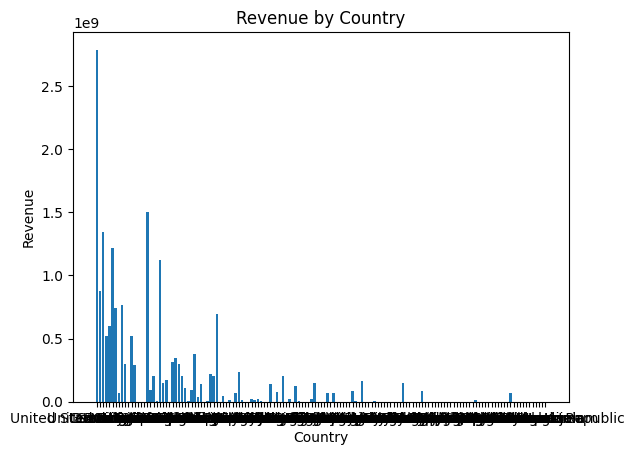

In [34]:
plt.bar(df['Country'], df['revenue'])
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Revenue by Country')
plt.show()